In [69]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

class RBF(object):

  def __init__(self,x,y,hidden):
    self.x=x
    self.y=y
    self.hidden=hidden
    self.b=0.01
    km=KMeans(self.hidden)
    km.fit(x)
    self.centers=km.cluster_centers_

  def gaussian(self,z):
    return np.exp(-1*z*z *self.b ) 

  def fit(self):
    self.n = np.ones([x.shape[0],self.hidden])
    for i in range(self.x.shape[0]):
      for j in range(self.hidden):
        self.n[i,j] = np.linalg.norm(self.x[i]-self.centers[j])
    self.a = self.gaussian(self.n)
    self.bias=np.ones([self.x.shape[0],1])
    self.a=np.concatenate((self.bias,self.a),axis=1)
    self.w = np.linalg.inv(self.a.T.dot(self.a)).dot(self.a.T).dot(self.y)

  def predict (self):
    o = self.a.dot(self.w)
    return o





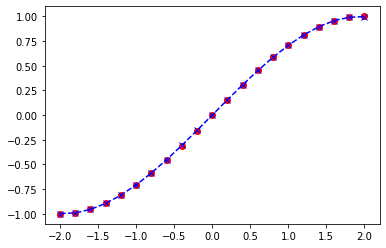

In [72]:
x = np.linspace(-2,2,21)[: , np.newaxis]
y = np.sin(x*np.pi/4)
model = RBF(x,y,4)
model.fit()
y2 = model.predict()
plt.plot(x,y,'ro',x,y2,'b--x')

In [71]:
x = np.array([[1,1],[1,0],[0,1],[0,0]])
y = np.array([[0,1,1,0]]).T
xor = RBF(x,y,2)
xor.centers=np.array([[1,1],[0,0]])
xor.fit()
xor.predict()

array([[-1.47891114e-07],
       [ 9.99999937e-01],
       [ 9.99999937e-01],
       [-1.48271283e-07]])